# ACTIVIDAD 2 - TECNICAS DE INTELIGENCIA ARTIFICAL - CLASIFICACIÓN

### 1. En la primer sentencia de código se exportan todas las librerías que serán utilizadas posteriormente

In [1]:
import sys
!{sys.executable} -m pip install pycm
import pandas as pd
import numpy as np
from matplotlib import pyplot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.utils.multiclass import type_of_target
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import itertools
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from pycm import ConfusionMatrix
from sklearn.metrics import roc_curve, auc

You should consider upgrading via the 'C:\Users\scmartinez\Anaconda3\python.exe -m pip install --upgrade pip' command.


### 2. Se procede a exportar el dataset a utilizar con pandas

In [2]:
ruta_url = 'https://www.openml.org/data/get_csv/1586212/phpPQrHPH'

leemos el achivo que contiene los datos y lo guardamos en un dataframe de Pandas

In [3]:
dataset = pd.read_csv(ruta_url)

In [4]:
print(dataset)

       V1  V2  V3  V4  V5     V6     V7  Class
0       0   0   0   0  20  20.00  46.10      1
1       1  19   0  19   8   8.00  46.10      1
2       2   0  20  19   8  22.47  46.10      1
3       3   0  20   8  42  23.41  46.10      1
4       4  19   8   8  42  35.74  46.10      1
...    ..  ..  ..  ..  ..    ...    ...    ...
10213   3  18  39  22  33   7.21  49.19      3
10214   4  22  33  22  20  13.00  49.19      3
10215   5  22  20  18  14   7.21  49.19      3
10216   6  18  14   0   8  18.97  49.19      3
10217   7   0   8  20   0  21.54  49.19      3

[10218 rows x 8 columns]


### 3. Empezamos a explorar el dataset para conocer los aspectos generales del conjunto de datos

In [5]:
print(dataset.shape)#Para saber el número de registros (instancias) y columnas (atributos)

(10218, 8)


In [6]:
dataset.head(10)#para visualizar que valores conforman los registros

,V1,V2,V3,V4,V5,V6,V7,Class
0,0,0,0,0,20,20.00,46.10,1
1,1,19,0,19,8,8.00,46.10,1
2,2,0,20,19,8,22.47,46.10,1
3,3,0,20,8,42,23.41,46.10,1
4,4,19,8,8,42,35.74,46.10,1
5,0,0,0,0,12,12.00,37.66,1
6,1,7,0,7,7,7.00,37.66,1
7,2,0,12,7,7,8.60,37.66,1
8,3,0,12,1,35,23.02,37.66,1
9,4,7,7,5,30,23.09,37.66,1


In [7]:
print(dataset.groupby('Class').size())#Para visualizar los valores de la clase de salida y los valores que la conforman

Class
1     1196
2     1192
3     1416
4      808
5     1008
6     1000
7      800
8     1198
9     1000
10     600
dtype: int64


In [8]:
dataset_stats = dataset.describe().transpose()
print(dataset_stats)

         count       mean        std    min    25%    50%    75%    max
V1     10218.0   2.222744   1.719632   0.00   1.00   2.00   3.00   7.00
V2     10218.0   6.061460   8.881774   0.00   0.00   0.00  12.00  48.00
V3     10218.0  15.246036  14.178974   0.00   0.00  13.00  24.00  63.00
V4     10218.0   9.341554   9.730991   0.00   0.00   7.00  17.00  50.00
V5     10218.0  21.029360  13.100119  -2.00  10.00  20.00  30.00  63.00
V6     10218.0  15.377823   7.795728   1.00   9.00  14.00  20.62  50.70
V7     10218.0  40.463523  11.124438  13.89  32.57  40.22  48.10  76.22
Class  10218.0   5.116853   2.836073   1.00   3.00   5.00   8.00  10.00


### 4. Ahora procedemos a aplicar cálculos estadísticos sobre el conjunto de datos para conocer la distribución de los valores

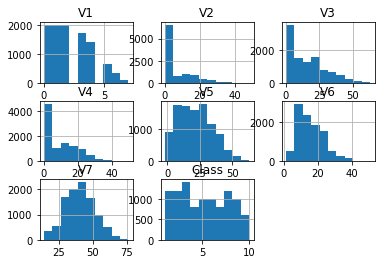

In [9]:
dataset.hist()
pyplot.show()

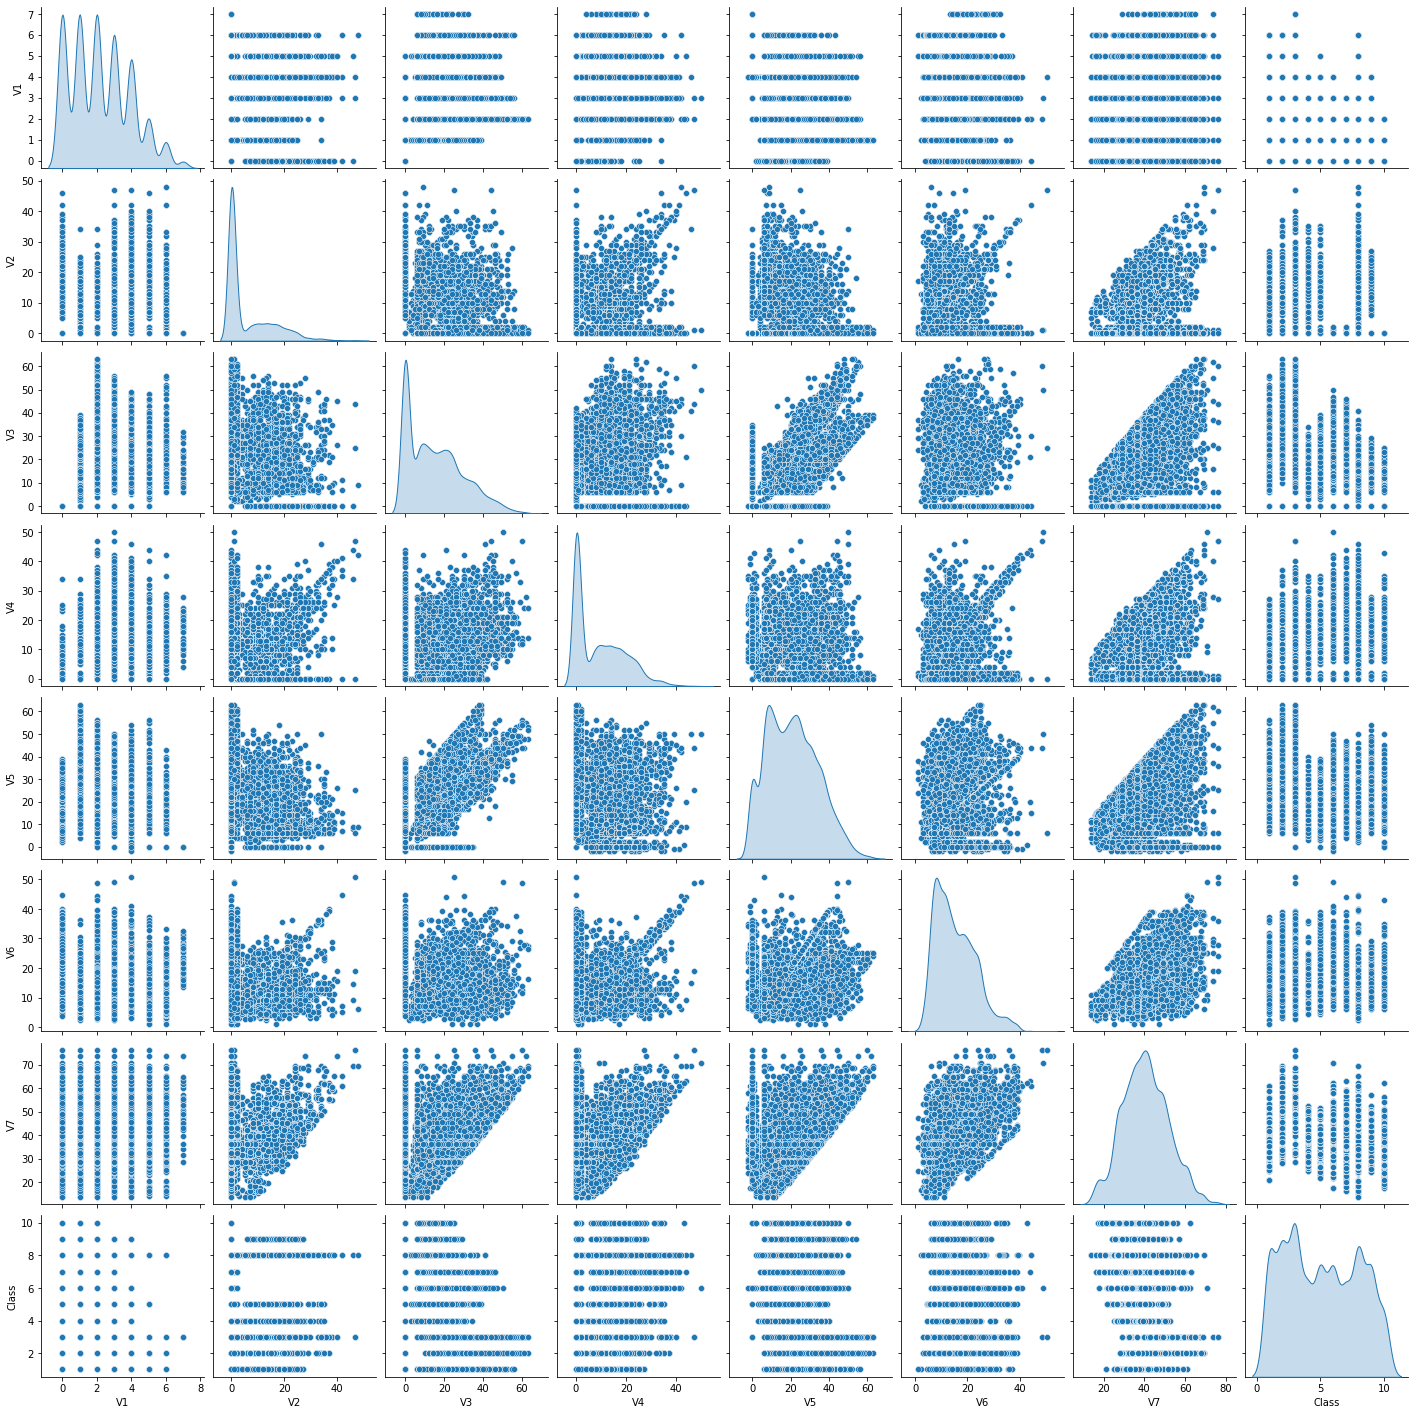

In [10]:
sns.pairplot(dataset, diag_kind="kde")

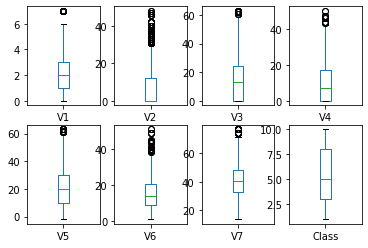

In [11]:
dataset.plot(kind='box',subplots=True, layout=(2,4), sharex=False, sharey=False)
pyplot.show()

### 5. Creación del Conjunto de Entrenamiento y validación

Primero se procede a dividir el dataset, se separan los atributos de entradas, de los atributos de salida

In [12]:
lista_datos = dataset.values
X = lista_datos[:,0:7]
y = lista_datos[:,7]

In [13]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, shuffle=True,test_size=0.30, random_state=10)

Luego se procede a normalizar los datos

In [14]:
sc = StandardScaler()
X = sc.fit_transform(X)
X_train = sc.fit_transform(X_train)
X_validation = sc.transform(X_validation)

Se procede a codificar la clase objetivo ya que cada una de las clases representa una categoria

In [15]:
y_rn = pd.get_dummies(y, prefix='Class').values
Y_train_rn = pd.get_dummies(Y_train, prefix='Class').values
Y_validation_rn = pd.get_dummies(Y_validation, prefix='Class').values

Se verifica el tipo de datos de los conjuntos de entrenamiento y validación

In [16]:
print(type_of_target(X_train))
print(type_of_target(X_validation))
print(type_of_target(Y_train))
print(type_of_target(Y_validation))

continuous-multioutput
continuous-multioutput
multiclass
multiclass


### 6. Comparación de los modelos de clasificación

Para esta actividad se compararán dos modelos predicitvos de clasificación, primero se utlizará una ***Red Neuronal*** luego se compará con el modelo predictivo ***CART***

In [17]:
#Se crea el diccionario modelos donde se guardarán los modelos a utilizar
#también se creará el diccionario resultados para guardar los resultados de los modelos y realizar una comparación conjunta
modelos = {}
resultados = {'nombre_modelo':[], 'resultado': []}

In [22]:
#Se crea el primer modelo predicitvo el cual esta basado en redes neuronales
modelos['RED_NEURAL'] = keras.Sequential([
    layers.Dense(100, activation='relu', input_shape=[X.shape[1]]),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [23]:
#Se compila el modelo que se acaba de crear con las métricas que se desea que utilice para efectuar la predicción
modelos['RED_NEURAL'].compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
#Se crean las listas donde se almacenará de forma intermedia los resultados de la validación cruzada para la red neuronal
acc_per_fold = []
loss_per_fold = []

In [25]:
# Se define el kfold para la red neuronal
kfold = KFold(n_splits=10, shuffle=True)

# Se procede a realizar la validación cruzada de la red neuronal
fold_no = 1
for train, test in kfold.split(X, y_rn):
    # Se imprime el número de fold
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history = modelos['RED_NEURAL'].fit(X[train], y_rn[train],
            batch_size=4,
            epochs=10,
            verbose=2)

    # Se generan las métricas de cada fold
    scores = modelos['RED_NEURAL'].evaluate(X[test], y_rn[test], verbose=0)
    print(f"Score for fold {fold_no}:{ modelos['RED_NEURAL'].metrics_names[0]} of {scores[0]}; {modelos['RED_NEURAL'].metrics_names[1]} of {scores[1]*100}%")
    acc_per_fold.append(scores[1])
    loss_per_fold.append(scores[0])

    # se incrementa el número de fold
    fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
2299/2299 - 1s - loss: 1.2634 - accuracy: 0.4711
Epoch 2/10
2299/2299 - 1s - loss: 0.8601 - accuracy: 0.5812
Epoch 3/10
2299/2299 - 1s - loss: 0.7988 - accuracy: 0.6018
Epoch 4/10
2299/2299 - 1s - loss: 0.7686 - accuracy: 0.6104
Epoch 5/10
2299/2299 - 1s - loss: 0.7512 - accuracy: 0.6181
Epoch 6/10
2299/2299 - 1s - loss: 0.7362 - accuracy: 0.6237
Epoch 7/10
2299/2299 - 1s - loss: 0.7266 - accuracy: 0.6327
Epoch 8/10
2299/2299 - 1s - loss: 0.7143 - accuracy: 0.6441
Epoch 9/10
2299/2299 - 1s - loss: 0.7079 - accuracy: 0.6382
Epoch 10/10
2299/2299 - 1s - loss: 0.7065 - accuracy: 0.6455
Score for fold 1:loss of 0.7146031856536865; accuracy of 62.52446174621582%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/10
2299/2299 - 1s - loss: 0.7013 - accuracy: 0.6488
Epoch 2/10
2299/2299 - 1s - loss: 0.6931 - accuracy: 0.6495
Epoch 3/1

In [26]:
#Se guardan los resultados de la precisión obtenidos en la validación cruzada en el diccionario de resultados
resultados['nombre_modelo'].append(('RED_NEURAL'))
resultados['resultado'].append((acc_per_fold))

In [27]:
#Luego se crea el modelo de árbol de clasificación CART
modelos['CART']= DecisionTreeClassifier()

In [28]:
#Se entrena mediante estratifiación cruzada para el modelo CART, dividiendo los datos de entrenamiento en 10 secciones
kfold = StratifiedKFold(n_splits=10, random_state=10, shuffle=True)
resultado_val_cruzada = cross_val_score(modelos['CART'], X_train, Y_train, cv=kfold, scoring='accuracy')

In [29]:
#Viausalizamos los datos de la validación cruzada
print(resultado_val_cruzada)

[0.8547486  0.85614525 0.85034965 0.85454545 0.83216783 0.86433566
 0.83356643 0.83216783 0.84475524 0.84755245]


In [30]:
#Guardamos los resultados obtenidos en la variable resultados
resultados['nombre_modelo'].append(('CART'))
resultados['resultado'].append((resultado_val_cruzada))

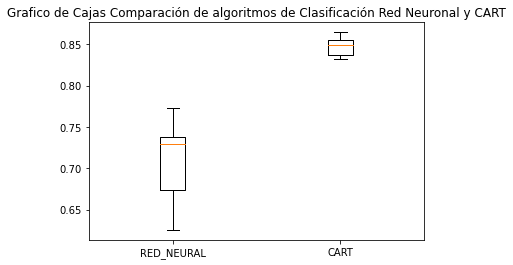

In [31]:
# Comparación de algoritmos 
pyplot.boxplot(resultados['resultado'], labels=resultados['nombre_modelo']) 
pyplot.title('Grafico de Cajas Comparación de algoritmos de Clasificación Red Neuronal y CART')
pyplot.show()

### 7. Entrenamiento y Validación de los modelos elegidos

In [32]:
#Antes de trabajar con los modelos creamos una lista conteniendo el nombre de las clases, la cual servirá para crear visualizaciones
nombre_clases = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

#### Modelo Predictivo Basado en Red Neuronal

Primero entrenamos el modelo

In [33]:
#Se entrena el modelo por diez epocas
history = modelos['RED_NEURAL'].fit(X_train, Y_train_rn, epochs=10)

Epoch 1/10
224/224 [==============================] - 0s 1ms/step - loss: 0.4456 - accuracy: 0.8061
Epoch 2/10
224/224 [==============================] - 0s 1ms/step - loss: 0.4119 - accuracy: 0.8160
Epoch 3/10
224/224 [==============================] - 0s 1ms/step - loss: 0.4041 - accuracy: 0.8244
Epoch 4/10
224/224 [==============================] - 0s 1ms/step - loss: 0.4007 - accuracy: 0.8241
Epoch 5/10
224/224 [==============================] - 0s 1ms/step - loss: 0.3978 - accuracy: 0.8269
Epoch 6/10
224/224 [==============================] - 0s 1ms/step - loss: 0.3951 - accuracy: 0.8276
Epoch 7/10
224/224 [==============================] - 0s 1ms/step - loss: 0.3945 - accuracy: 0.8269
Epoch 8/10
224/224 [==============================] - 0s 1ms/step - loss: 0.3929 - accuracy: 0.8268
Epoch 9/10
224/224 [==============================] - 0s 1ms/step - loss: 0.3925 - accuracy: 0.8277
Epoch 10/10
224/224 [==============================] - 0s 1ms/step - loss: 0.3925 - accuracy: 0.8247

Luego lo validamos con el conjunto de datos de validación

In [34]:
rn_pred_score = modelos['RED_NEURAL'].predict(X_validation)
rn_pred_score = np.argmax(rn_pred_score, axis=1) + 1

En base a la validación anterior revisamos el nivel de precisión de nuestro modelo

In [35]:
print(accuracy_score(Y_validation, rn_pred_score))

0.8065883887801696


In [36]:
rn_eva_score = modelos['RED_NEURAL'].evaluate(X_validation, Y_validation_rn, verbose=1)
print("Test Score:", rn_eva_score[0])
print("Test Accuracy:", rn_eva_score[1])

96/96 [==============================] - 0s 598us/step - loss: 0.4124 - accuracy: 0.8066
Test Score: 0.4123503565788269
Test Accuracy: 0.8065884113311768


procedemos a generar y graficar la matriz de confusión para el modelo predictivo basado en Red Neuronal

In [37]:
rn_confusion_matrix = confusion_matrix(Y_validation, rn_pred_score, labels=nombre_clases)

Matriz de Confusión de Red Neuronal Sin Normalizar
[[279   0   0   0   0  11   4   0  60  13]
 [  2 272  42   0   0   1   2   0   9   4]
 [  1  70 335   0   4   0   1   0   3   0]
 [  0   0   0 247   0   0   0  12   0   0]
 [  0   4   3   0 303   0   0   0   0   0]
 [ 14   0   0   0   0 216  37   0  15  19]
 [ 16   1   0   0   0  33 160   0   9  28]
 [  0   0   0  62   0   0   0 301   0   0]
 [ 40   1   0   0   0   3   2   0 244  11]
 [  8   3   4   0   0   9  21   0  11 116]]


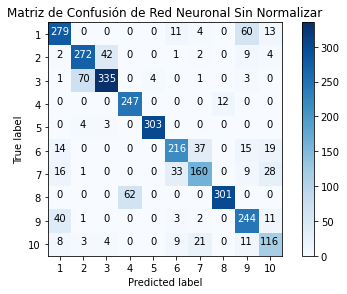

Matriz de Confusión de Red Neuronal Normalizada
[[0.76021798 0.         0.         0.         0.         0.02997275
  0.01089918 0.         0.16348774 0.03542234]
 [0.0060241  0.81927711 0.12650602 0.         0.         0.00301205
  0.0060241  0.         0.02710843 0.01204819]
 [0.00241546 0.16908213 0.80917874 0.         0.00966184 0.
  0.00241546 0.         0.00724638 0.        ]
 [0.         0.         0.         0.95366795 0.         0.
  0.         0.04633205 0.         0.        ]
 [0.         0.01290323 0.00967742 0.         0.97741935 0.
  0.         0.         0.         0.        ]
 [0.04651163 0.         0.         0.         0.         0.71760797
  0.12292359 0.         0.04983389 0.06312292]
 [0.06477733 0.00404858 0.         0.         0.         0.13360324
  0.64777328 0.         0.03643725 0.11336032]
 [0.         0.         0.         0.1707989  0.         0.
  0.         0.8292011  0.         0.        ]
 [0.13289037 0.00332226 0.         0.         0.         0.00996

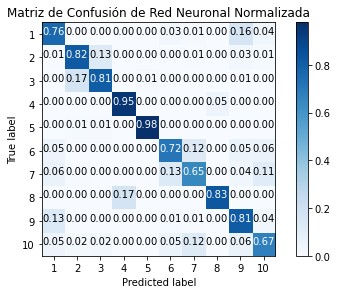

In [38]:
normalizacion = [False, True]
for normalize in normalizacion:
    if normalize:
        rn_confusion_matrix = rn_confusion_matrix.astype('float') / rn_confusion_matrix.sum(axis=1)[:, np.newaxis]
        print('Matriz de Confusión de Red Neuronal Normalizada')
        print(rn_confusion_matrix)
        pyplot.title('Matriz de Confusión de Red Neuronal Normalizada')
    else:
        print('Matriz de Confusión de Red Neuronal Sin Normalizar')
        print(rn_confusion_matrix)
        pyplot.title('Matriz de Confusión de Red Neuronal Sin Normalizar')
    pyplot.imshow(rn_confusion_matrix, interpolation='nearest', cmap=pyplot.cm.Blues)
    pyplot.colorbar()
    tick_marks = np.arange(len(nombre_clases))
    pyplot.xticks(tick_marks, nombre_clases)
    pyplot.yticks(tick_marks, nombre_clases)

    fmt = '.2f' if normalize else 'd'
    thresh = rn_confusion_matrix.max() / 2.
    for i, j in itertools.product(range(rn_confusion_matrix.shape[0]), range(rn_confusion_matrix.shape[1])):
        pyplot.text(j, i, format(rn_confusion_matrix[i, j], fmt), horizontalalignment='center', color='white' if rn_confusion_matrix[i, j] > thresh else 'black')

    pyplot.tight_layout()
    pyplot.ylabel('True label')
    pyplot.xlabel('Predicted label')
    pyplot.show()

También utilizamos la librería pycm para obtener estadísticas más precisas de nuestro modelo predictivo como ser TPR y FPR

In [39]:
rn_estadisticas_cm = ConfusionMatrix(actual_vector=Y_validation,predict_vector=rn_pred_score)
print(rn_estadisticas_cm)

Predict    1          1.0        10         10.0       2          2.0        3          3.0        4          4.0        5          5.0        6          6.0        7          7.0        8          8.0        9          9.0        
Actual
1          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          

1.0        279        0          13         0          0          0          0          0          0          0          0          0          11         0          4          0          0          0          60         0          

10         0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          

10.0       8          0          116        0          3      

C:\Users\scmartinez\AppData\Roaming\Python\Python38\site-packages\pycm\pycm_obj.py:195: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


#### Modelo Predictivo CART

Primero entrenamos el modelo con el conjunto de datos de entrenamiento

In [40]:
cart_clasificador = modelos['CART'].fit(X_train, Y_train)

Luego lo validamos con el conjunto de datos de validación

In [41]:
cart_pred_score = modelos['CART'].predict(X_validation)

En base a la validación anterior revisamos el nivel de precisión de nuestro modelo

In [42]:
print(accuracy_score(Y_validation, cart_pred_score))

0.8584474885844748


procedemos a generar y graficar la matriz de confusión para el modelo predictivo CART

Matriz de Confusión CART Sin Normalizar
[[306   0   2   2   0   4   4   2  40   7]
 [  0 281  39   0   2   6   2   0   0   2]
 [  0  46 366   0   2   0   0   0   0   0]
 [  0   0   2 235   0   0   0  22   0   0]
 [  3   0   6   0 301   0   0   0   0   0]
 [  6   2   0   2   0 260  18   0   5   8]
 [  6   0   0   2   0  27 193   0   6  13]
 [  4   0   2  31   0   2   2 322   0   0]
 [ 54   0   0   0   2   1   0   0 241   3]
 [  1   0   2   2   0  19  12   0   9 127]]
Matriz de Confusión CART Normalizada
[[0.83378747 0.         0.00544959 0.00544959 0.         0.01089918
  0.01089918 0.00544959 0.10899183 0.01907357]
 [0.         0.84638554 0.11746988 0.         0.0060241  0.01807229
  0.0060241  0.         0.         0.0060241 ]
 [0.         0.11111111 0.88405797 0.         0.00483092 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.00772201 0.90733591 0.         0.
  0.         0.08494208 0.         0.        ]
 [0.00967742 0.         0.01935484 0.         0.

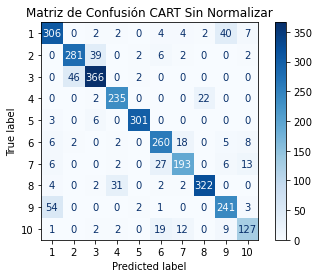

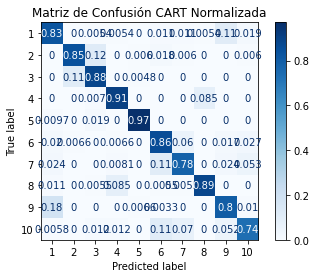

In [43]:
# Plot non-normalized confusion matrix - Tomado de la documentación oficial de scikitlearn
cart_titulos_cm = [("Matriz de Confusión CART Sin Normalizar", None),
                  ("Matriz de Confusión CART Normalizada", 'true')]
for titulo, normalizacion in cart_titulos_cm:
    cart_visualizacion_cm = plot_confusion_matrix(cart_clasificador, X_validation, Y_validation,
                                 display_labels=nombre_clases,
                                 cmap=pyplot.cm.Blues,
                                 normalize=normalizacion)
    cart_visualizacion_cm.ax_.set_title(titulo)

    print(titulo)
    print(cart_visualizacion_cm.confusion_matrix)

pyplot.show()

También utilizamos la librería pycm para obtener estadísticas más precisas de nuestro modelo predictivo como ser TPR y FPR

In [44]:
cart_estadisticas_cm = ConfusionMatrix(actual_vector=Y_validation,predict_vector=cart_pred_score)
print(cart_estadisticas_cm)

Predict    1.0        2.0        3.0        4.0        5.0        6.0        7.0        8.0        9.0        10.0       
Actual
1.0        306        0          2          2          0          4          4          2          40         7          

2.0        0          281        39         0          2          6          2          0          0          2          

3.0        0          46         366        0          2          0          0          0          0          0          

4.0        0          0          2          235        0          0          0          22         0          0          

5.0        3          0          6          0          301        0          0          0          0          0          

6.0        6          2          0          2          0          260        18         0          5          8          

7.0        6          0          0          2          0          27         193        0          6          13         

8.0       

C:\Users\scmartinez\AppData\Roaming\Python\Python38\site-packages\pycm\pycm_obj.py:195: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)
